In [ ]:
# Reference:

sumofx = 386
sumofy = 460
sumofx2 = 25426
sumofy2 = 28867
sumofxy = 26161
n = 8

Sxx = sumofx2 - (sumofx)**2/n
Syy = sumofy2 - (sumofy)**2/n
Sxy = sumofxy - (sumofx*sumofy)/n

beta_1 = Sxy/Sxx
beta_0 = mean_y - beta_1*mean_x


total_sum_of_square = Syy
regression_sum_of_square = beta_1*Sxy
residual_sum_of_square = Syy - beta_1*Sxy


# Exercise 1

In [20]:

n = 20

sumofx = 809
sumofy = 68.3

Sxx = 3630.95
Sxy = 201.665
Syy = 12.9455

mean_x = sumofx/n
mean_y = sumofy/n

beta_1 = Sxy/Sxx
beta_0 = mean_y - beta_1*mean_x

print("y-intercept is : ",beta_0)
print("Slope is: ", beta_1)


total_sum_of_square = Syy
regression_sum_of_square = beta_1*Sxy
residual_sum_of_square = Syy - beta_1*Sxy

print("Total Sum of Square: ", total_sum_of_square)
print("Regression Sum of Square: ", regression_sum_of_square)
print("Residual Sum of Square: ", residual_sum_of_square)


print("Mean Square of Regression : ", regression_sum_of_square/1)
print("Mean Square of Residual : ", residual_sum_of_square/(n-1-1))

print("F Value is: ", (regression_sum_of_square/1)/(residual_sum_of_square/(n-1-1)))


# for F distribution

from scipy.stats import distributions as dists

fcritical = dists.f.ppf(1-0.001,1,18)  # F statistics with DF regression = 1, Residual =18
print("The critical value for 0.1% significant level is: ",fcritical)


# Notice that 115.54191958698756 > 15.3793059774, we reject the null hypothesis in favor of alternative hypothesis
# null hypothesis is beta_1 = 0, alternative hypothesis is beta_1 <> 0

y-intercept is :  1.1683843071372504
Slope is:  0.055540561010203944
Total Sum of Square:  12.9455
Regression Sum of Square:  11.200587236122779
Residual Sum of Square:  1.7449127638772204
Mean Square of Regression :  11.200587236122779
Mean Square of Residual :  0.09693959799317892
F Value is:  115.54191958698756
The critical value for 1% significant level is:  15.3793059774


# Exercise 2

In [26]:

t = [50,50, 60,60, 70,70, 80,80, 90,90, 100,100]
h = [ 1.64, 1.6,1.63, 1.65, 1.67, 1.67, 1.72,1.70 , 1.72, 1.71, 1.74, 1.71]

import pandas as pd
df = pd.DataFrame( {'t': t, 'h': h})

df

h    t
0   1.64   50
1   1.60   50
2   1.63   60
3   1.65   60
4   1.67   70
5   1.67   70
6   1.72   80
7   1.70   80
8   1.72   90
9   1.71   90
10  1.74  100
11  1.71  100

Text(0,0.5,'h')

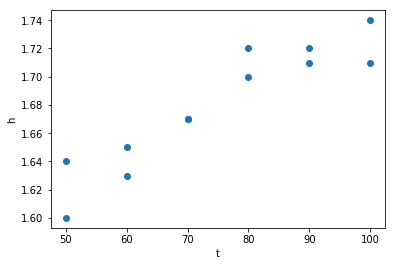

In [28]:
import matplotlib.pyplot as plt

plt.plot(t,h,"o")
plt.xlabel("t")
plt.ylabel("h")

# The data follow a broadly linear increasing trend with roughly constant scatter. 
# It is reasonable to assume that the temperature is preset by the experimenters without error. 


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

# using dataframe as the basis for statistical modeling

df = pd.DataFrame(
    {'t':t,
     'h':h})

# y~x meaning that the target variable is y, the predictor is x

result = smf.ols('h~t',data = df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     64.41
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           1.15e-05
Time:                        09:33:10   Log-Likelihood:                 33.219
No. Observations:                  12   AIC:                            -62.44
Df Residuals:                      10   BIC:                            -61.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5107      0.022     69.831      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [31]:
new_record = [85]

new_record = pd.DataFrame(
    {'t':new_record
    })


res = result.predict(new_record)

print("The predicted Heat for temperature equal to 85 is", res)

The predicted Heat for temperature equal to 85 is 0    1.702571
dtype: float64


# Exercise 3:

In [3]:
# Exercise 3:

price = [14, 20, 37, 36, 31, 42, 54, 64, 38, 66, 64, 77, 79, 93, 119, 135]
length = [120, 120, 120, 120, 150, 150, 150, 150, 180, 180, 180, 180, 240, 240, 240, 240]
width = [60, 80, 100, 120, 75, 100, 125, 150, 90, 120, 150, 180, 120, 160, 200, 240]

Text(0,0.5,'price')

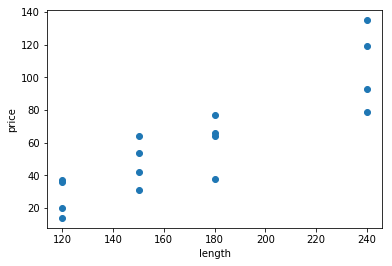

In [4]:
import matplotlib.pyplot as plt

plt.plot(length,price,"o")
plt.xlabel("length")
plt.ylabel("price")


Text(0,0.5,'price')

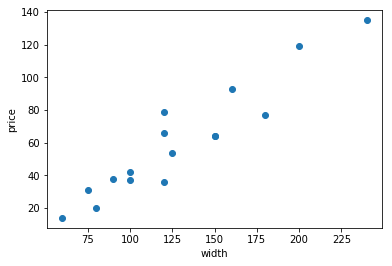

In [5]:
import matplotlib.pyplot as plt

plt.plot(width,price,"o")
plt.xlabel("width")
plt.ylabel("price")

In [ ]:
# The graphs show a tendency for price to increase roughly linearly as either width or length increases. 
# There may be more scatter in the plot against length and a slight tendency for this to increase with length, 
# but these features may be due to the dependence of price on width

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

# using dataframe as the basis for statistical modeling

df = pd.DataFrame(
    {'price':price,
     'length':length,
    'width':width })

# price~length+width meaning that the target variable is price, the predictor are length and width

result = smf.ols('price~length+width',data = df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     300.4
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.31e-11
Time:                        02:23:03   Log-Likelihood:                -47.804
No. Observations:                  16   AIC:                             101.6
Df Residuals:                      13   BIC:                             103.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -52.6714      5.345     -9.854      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [18]:
new_record = pd.DataFrame(
    {'length':[200],
     'width':[150]
    })

res = result.predict(new_record)

res = float(res)

print("The predicted price for length equal to 200cm and width equal to 150cm is: $",res)


The predicted price for length equal to 200cm and width equal to 150cm is: $ 78.61428571428574


In [ ]:
# Negative predicted prices will be given for sufficiently small carpets, since the constant term is −52.671, and such results are obviously unreasonable.
# This illustrates the danger of extrapolation, or assuming that the model necessarily holds for values of the predictor variables well away from the observed data used to fit it. 

In [1]:
# for F distribution

from scipy.stats import distributions as dists

fcritical = dists.f.ppf(1-0.001,2,13)  # F statistics with DF regression = 2, Residual =13
print("The critical value for 0.1% significant level is: ",fcritical)

The critical value for 0.1% significant level is:  12.3127298107


In [ ]:
## Notice that the F Statistics is 300.4 > 12.3127, we reject the null hypothesis (beta_0 = beta_1=beta_2=0) in favor of alternative hypothesis, taking 0.1% significant level

## The p-values for length and width are all smaller than 0.1%, we reject the null hypothesis(beta_1=0, beta_2=0) in favor of alternative hypothesis (beta_1 <>0,beta_2 <>0) 

## The R-squared = 0.98 which means 98% of Y is explained by the model

## In summary, the fitted multiple linear model is useful for making prediction on price based on length and width

# Exercise 4:

In [19]:
x = [1965,1970,1975,1980,1985,1990,1995,2000,2005]
y = [109,114,116,117,114,127,131,138,141]

Text(0,0.5,'y')

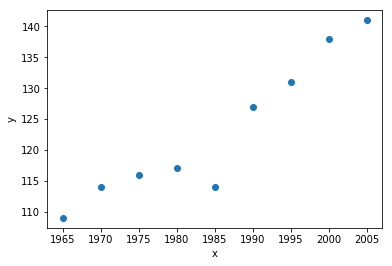

In [22]:
import matplotlib.pyplot as plt

plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("y")

# there is an outlier in x = 1985, the linear effect should be more strong if we remove the outlier data

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

# using dataframe as the basis for statistical modeling

df = pd.DataFrame(
    {'year':x,
     'speed':y})

# price~length+width meaning that the target variable is price, the predictor are length and width

result = smf.ols('speed~year',data = df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     60.00
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           0.000112
Time:                        02:36:18   Log-Likelihood:                -24.116
No. Observations:                   9   AIC:                             52.23
Df Residuals:                       7   BIC:                             52.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1465.0000    205.014     -7.146      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [ ]:
# The fitted model is y_hat = -1465 + 0.8x

In [40]:
sumofx = sum(x)
sumofy = sum(y)

sumofx2 = sum([a*b for a,b in zip(x,x)])
sumofy2 = sum([a*b for a,b in zip(y,y)])
sumofxy = sum([a*b for a,b in zip(x,y)])

Sxx = sumofx2 - (sumofx)**2/len(x)
Syy = sumofy2 - (sumofy)**2/len(x)
Sxy = sumofxy - (sumofx*sumofy)/len(x)


beta_1 = Sxy/Sxx
beta_0 = sumofy/len(y) - beta_1*sumofx/len(x)


total_sum_of_square = Syy
regression_sum_of_square = beta_1*Sxy
residual_sum_of_square = Syy - beta_1*Sxy

print("total sum of square is :",total_sum_of_square)
print("regression sum of square is :", regression_sum_of_square)

print("residual sum of square is :", total_sum_of_square-regression_sum_of_square )


print("residual/error mean square is", (total_sum_of_square-regression_sum_of_square)/(len(x)-2))

total sum of square is : 1072.0
regression sum of square is : 960.0
residual sum of square is : 112.0
residual/error mean square is 16.0


In [41]:
df

speed  year
0    109  1965
1    114  1970
2    116  1975
3    117  1980
4    114  1985
5    127  1990
6    131  1995
7    138  2000
8    141  2005

In [51]:
new_df = df.drop(df.index[4])

In [52]:
result = smf.ols('speed~year',data = new_df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     275.9
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           3.04e-06
Time:                        03:18:50   Log-Likelihood:                -15.188
No. Observations:                   8   AIC:                             34.38
Df Residuals:                       6   BIC:                             34.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1463.8750     95.601    -15.312      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
# The fitted model is y_hat = -1463.875 + 0.8x

In [67]:
new_record = pd.DataFrame(
    {'year':[1985,2010]
    })

res = result.predict(new_record)

# res = float(res)

print("The expected winning speed in 1985 and 2010 are: ",res[0], "and ", res[1], "respectively")


The expected winning speed in 1985 and 2010 are:  124.125 and  144.125 respectively


In [83]:
# The equation is : 160 = -1463.875 + 0.8x

from sympy.solvers import solve
from sympy import Symbol

x = Symbol('x')
ans = solve(-1463.875+0.8*x-160, x)


# Reference:http://docs.sympy.org/latest/modules/solvers/solvers.html

print("The time by which a winning speed of 160mph is in Year:", round(float(ans[0])))

The time by which a winning speed of 160mph is in Year: 2030


In [89]:
summary = new_df.describe()

In [95]:
summary.loc[['min','max']]

speed    year
min  109.0  1965.0
max  141.0  2005.0

In [ ]:
# Notice that in (b) the year 2010 is outside the range of year
# and in (c) the speed is outside the range of speed,
# both would cause extrapolating beyond the range of the data,
# therefore, assuming that the fitted trend continues to apply in the future, which may not be true


# Exercise 5:

In [108]:
x = [1.8,3.0,4.0,5.7,7.2,8.4,10.3]
t = [3.4,5.9,7.0,8.7,9.5,10.4,11.1]

In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

# using dataframe as the basis for statistical modeling

df = pd.DataFrame(
    {'x':x,
     't':t})

# price~length+width meaning that the target variable is price, the predictor are length and width

result = smf.ols('t~x',data = df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     67.97
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           0.000428
Time:                        04:11:07   Log-Likelihood:                -7.0382
No. Observations:                   7   AIC:                             18.08
Df Residuals:                       5   BIC:                             17.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0270      0.672      4.506      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0,0.5,'t')

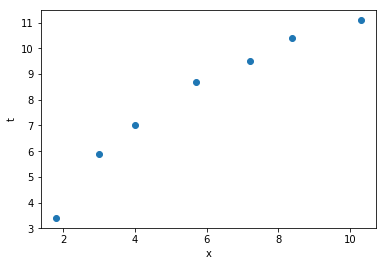

In [110]:
import matplotlib.pyplot as plt

plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("t")

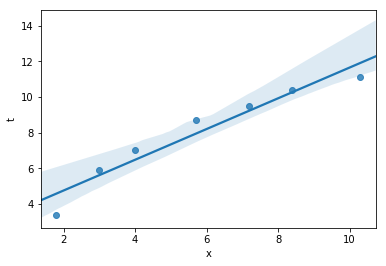

In [111]:
import seaborn as sns

sns.regplot(x='x', y='t', data=df)

In [ ]:
# Values of t show a strong increasing trend with x, 
# but the trend appears to be a curve with decreasing gradient, rather than a straight line. 
# It appears that the straight line model will underestimate the value of t in the middle of the range of x but overestimate the value of t for low or high values of x. 

In [112]:
import numpy as np
logx = np.log(x)

In [141]:
df2 = pd.DataFrame(
    {'logx':logx,
     't':t})

# price~length+width meaning that the target variable is price, the predictor are length and width

result2 = smf.ols('t~logx',data = df2).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2847.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           4.37e-08
Time:                        04:20:39   Log-Likelihood:                 5.7922
No. Observations:                   7   AIC:                            -7.584
Df Residuals:                       5   BIC:                            -7.693
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9181      0.141      6.516      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
# the fitted model is t_hat = 0.9181 +4.4074*logx

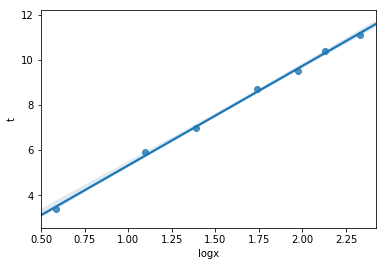

In [115]:
import seaborn as sns

sns.regplot(x='logx', y='t', data=df2)

In [145]:
math.log(6)

1.791759469228055

In [144]:
new_record = pd.DataFrame(
    {'x':[6]
    })

res = result.predict(new_record)

#new_record2 = math.log(6)

new_record2 = pd.DataFrame(
    {'logx':[math.log(6)]
    })

res2 = result2.predict(new_record2)


print("The predicted value for first model and second model are: ",res[0], "and ", res2[0], "respectively")


The predicted value for first model and second model are:  8.19695193435 and  8.81518615408 respectively


In [ ]:
# As expected for this middle-range value of x, the first model under-predicts compared with the second, by about 0.6. 
# The discrepancy far exceeds the observable scatter for the second model, reinforcing the superiority of the second model. 